## Linear Regression - Task 1
## Done by - Monish Kumar R


In [3]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [15]:
# Reading data from remote link
data = pd.read_csv('http://bit.ly/w-data')
print("The Data is imported successfully")

s_data.tail(10)

The Data is imported successfully


,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [16]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


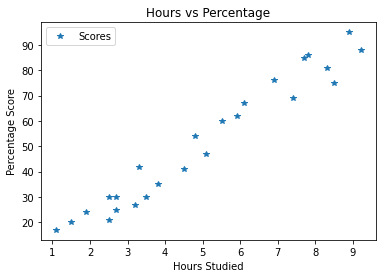

In [17]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

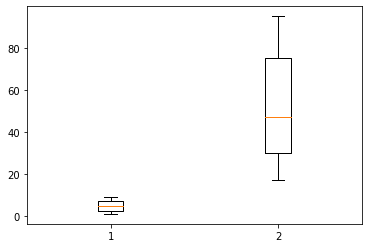

In [20]:
import seaborn as sns

plt.boxplot(data)
plt.show()

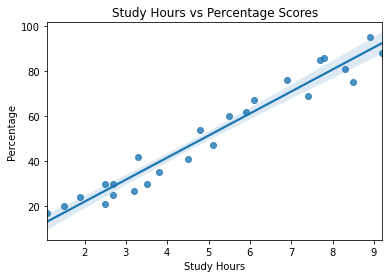

In [29]:
#plotting regressor plot to determine the relationship between feature and target
sns.regplot(x=data['Hours'],y=data['Scores'],data=data)
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### **Preparing the data**

dividing the data into two - "attributes" (inputs) and "labels" (outputs).

In [21]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values  

In [25]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

In [26]:

print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (17, 1)
Y train.shape = (17,)
X test.shape  = (8, 1)
Y test.shape  = (8,)


### **Training the Algorithm**


In [27]:
from sklearn.linear_model import LinearRegression  
L_regressor = LinearRegression()  
L_regressor.fit(X_train, y_train) 

print("Trained our model")

Trained our model


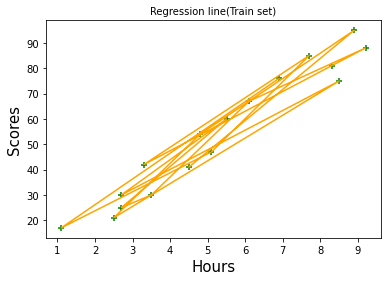

In [30]:
##plotting on train data
plt.scatter(X_train,Y_train,color='green',marker='+')
plt.plot(X_train,Y_train,color='orange')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()

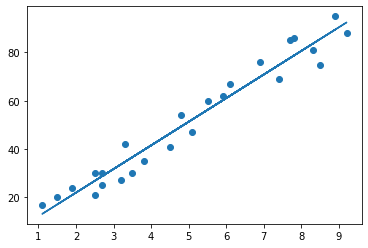

In [35]:
# Plotting the regression line
line = L_regressor.coef_*X+L_regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Predictions

In [36]:
print(X_test) # Testing data - In Hours
y_pred = L_regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [39]:

#Estimating training and test score
print("Training Score:",L_regressor.score(X_train,y_train))
print("Test Score:",L_regressor.score(X_test,y_test))

Training Score: 0.9484997422695115
Test Score: 0.9568211104435257


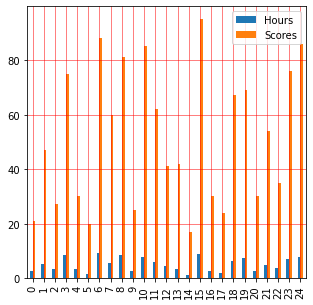

In [38]:
data.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

### **Evaluating the model**

.

In [50]:
from sklearn import metrics   
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))


Mean Squared Error: 22.96509721270043


In [54]:
from sklearn import metrics  

print('R-2:', metrics.r2_score(y_test, y_pred))


R-2: 0.9568211104435257
